## EECS 461 Machine Learning Term Project - İstanbul Şehir Üniversitesi
#### Professor: Mehmet Serkan Apaydın
#### Student: Amer Nour Eddin

#### 08.Feb.2018
--------------------------------------------------------------------------------------------------------------------------------


# << Generative Adversarial Networks GANs >>
==================================================================

### >>> Preface <<< 

### What is the difference between a Generative and a discriminative model?

![title](img/1.JPG)

#### Generative Models:
Aim to model how the data is generated. From [ P(x|c)×P(c)P(x|c)×P(c) ] we can obtain [ P(c|x)P(c|x) ] (Bayes' Theorem). - They (Generative models) try to learn a joint probability distribution P(x,c)P(x,c)
##### Pros:
We have the knowledge about the data distribution.	
##### Cons:
Very expensive to get (a lot of parameters)
Need lots of data

#### Discriminative Models:  (The kind of Models we studied in class)
Aim at learning P(c|x)P(c|x) by using probabilistic approaches (e.g., logistic regression), or by mapping classes from a set of points (e.g., perceptrons and SVMs).
##### Pros:
Easy to model
##### Cons:
To classify, but not to generate the data.




Let's say you have input data x and you want to classify the data into labels y. A generative model learns the joint probability distribution p(x, y) and a discriminative model learns the conditional probability distribution p(y|x) - which you should read as "the probability of y given x".


Here's a REALLY SIMPLE example. Suppose you have the following data in the form (x, y):

### {(1, 0), (1, 0), (2, 0), (2, 1)}

##### p(x, y) is:
|     | y=0 | y=1 |
|:---:|:---:|:---:|
| x=1 | 1/2 |  0  |
| x=2 | 1/4 | 1/4 |
                                                            Generative

-----------------------------------

##### p(y|x) is:                                                               
|     | y=0 | y=1 | 
|:---:|:---:|:---:|
| x=1 |  1  |  0  | 
| x=2 | 1/2 | 1/2 |
                                                          Discriminative





If you take a few minutes to stare at those two matrices, you will understand the difference between the two probability distributions.


![title](img/2.JPG)

So __discriminative algorithms__ learn the boundaries between classes while __generative algorithms__learn the distribution of classes.

### What is a Generative Adversarial Network? 

Generative Adversarial Network GAN is a relatively new Machine Learning topic introduced by by Ian Goodfellow and his colleagues at the University of Montreal in 2014. So obviously it is a new field and it is now from the hottest research topics in Machine Learning.

GAN, is a type of __generative model__ – a model that looks at the training data drawn from a certain distribution and tries to estimate that distribution. New samples obtained from such model look like original training samples.


In words, GANs basically contains tow neural nets one is called the discriminator D and the other is called the generator G. D is playing the role of a detector (classifier) that will be trained on a real data and can after training decide on a given sample that it is real or fake, in the same time G is playing the role of the forger for D (adversary) so from a given noise or latent space it tries to generat a sample that will hopfully fool D and make it say that it is a real sample, and G keeps improving his samples as he gets caught by D until we reach a point that D cannot decide whether the sample is real or fake at that point we discard D and we now have a fully skilled generative network G that can generate nearly real samples from noise!


![title](img/3.JPG)
![title](img/4.JPG)

#### Generator
+	Draw some parameter z from a source of randomness, e.g. a normal distribution
+	Apply a function f such that we get x′=G(u,w)
+	Compute the gradient with respect to w to minimize logp(y=fake|x′) === (cost)


#### Discriminator
+	Improve the accuracy of a binary classifier f, i.e. maximize logp(y=fake|x′) for fake data and logp(y=true|x) for real data.
+	There are two optimization problems running simultaneously, and the optimization terminates if a stalemate has been reached.
+	The models play two distinct (literally, adversarial) roles.



![title](img/5.JPG)

#### So, practicaly, there are really only 5 components to think about:
   *	R: The original, genuine data set
   *	I: The random noise that goes into the generator as a source of entropy
   *	G: The generator which tries to copy/mimic the original data set
   *	D: The discriminator which tries to tell apart G’s output from R 
   
 __* The actual ‘training’ loop is where we teach G to trick D and D to beware G.__


## Use cases of GANs


![title](img/6.JPG)


![title](img/8.JPG)

Essentially, Generate images, videos, text, any data type!

Researchers from Insilico Medicine proposed an approach of artificially intelligent drug discovery using GANs. The goal is to train the Generator to sample drug candidates for a given disease as precisely as possible to existing drugs from a Drug Database.


![title](img/7.JPG)

### Types of GANs

There are many types of GANs;

+ DCGAN(Deep Convolutional GAN)
+ CGAN (Conditional GAN)
+ Improved DCGAN
+ etc. 

I won't explain these types since my focus will be on one specific type which is called __WGAN (Wasserstein Generative Adverserial Network)__

GANs (vanilla GANs) have always had problems with convergence and, as a consequence, you don’t really know when to stop training them. In other words, the loss function doesn’t correlate with image quality. This is a big problem because:

*	You need to be constantly looking at the samples to tell whether your model is training correctly or not.
*	You don’t know when to stop training (no perfect convergence).
*	You don’t have a numerical value that tells you how well you are tuning the parameters.

This interpretability issue is one of the problems that Wasserstein GANs aims to solve. How? GANs (Vanilla GANs) can be interpreted to minimize the __Jensen-Shannon divergence__, which is 0 if the real and fake distribution don’t overlap (which is usually the case). So, instead of minimizing the JS divergence, the authors use the __Wasserstein distance aka. Eearth Mover distance__, which describes the distance between the “points” from one distribution to the other.

So, WassGAN has a loss function that correlates with image quality and ***enables convergence***. It is also ***more stable***, meaning that it is not as dependent on the architecture.

So, if you are __looking for a state-of-the-art GAN with the highest training stability__ and __want an informative and interpretable loss function.__ your choice is to use the WGAN.


##### Below is an example plot for the (Loss) of a normal GAN that can clearly show you the instability problem when training the GANs

P.S. I will create my own plot for my own WGAN at the end of my code which will show the difference and how WGAN is more stable.


![title](img/9.JPG)

## Tensorflow implementation for the WGAN 
=============================================================
###### + detailed comments

The following is a very simple and straight forward implementation for a WGAN using Tensorflow framework.

**The MNIST dataset is used as the real dataset and the code is a simple Wasserstein Generative Adverserial Network architecture that tries learning how to produce the MNIST dataset from a random noise..** (So the desired output is the MNIST digits, from input of random noise)

*You can follow my comments line by line in case there are any ambiguous parts that you didn't understrand.* 

In [10]:
# necessary imports

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import time

In [11]:
# defining some constants

mb_size = 32 # mini batch size
X_dim = 784 # MNIST data input (img shape: 28*28)
z_dim = 10 # MNIST total classes (0-9 digits)
h_dim = 128 # hidden layer number of neurons

In [12]:
# Loading the data

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

Extracting ../../MNIST_data\train-images-idx3-ubyte.gz
Extracting ../../MNIST_data\train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
mnist[0]

In [13]:
# Xavier initilization function for implementing the random weight initialization for the neural network
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

### >>>>>>> Construction Phase <<<<<<<

In [14]:
X = tf.placeholder(tf.float32, shape=[None, X_dim]) # a placeholder for the input of the Discriminator (real data)

# Discriminator First Layar
D_W1 = tf.Variable(xavier_init([X_dim, h_dim])) # wights
D_b1 = tf.Variable(tf.zeros(shape=[h_dim])) # bias

# Discriminator Second Layar
D_W2 = tf.Variable(xavier_init([h_dim, 1])) #wights
D_b2 = tf.Variable(tf.zeros(shape=[1])) # bias

theta_D = [D_W1, D_W2, D_b1, D_b2]  # theta_D is a list of the Discriminator parameters

In [15]:
z = tf.placeholder(tf.float32, shape=[None, z_dim]) # a placeholder for the input of the Generator (random noise)

# Generator Second Layar
G_W1 = tf.Variable(xavier_init([z_dim, h_dim])) # wights
G_b1 = tf.Variable(tf.zeros(shape=[h_dim])) # bias

# Generator Second Layar
G_W2 = tf.Variable(xavier_init([h_dim, X_dim])) # wights
G_b2 = tf.Variable(tf.zeros(shape=[X_dim])) # bias

theta_G = [G_W1, G_W2, G_b1, G_b2] # theta_D is a list of the Generator parameters


In [16]:
# random values size m*n
def sample_z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [17]:
# Generator Neural Network function
def generator(z):
    # multiply input (z) matrix with (wights) matrix and add the result to bias values and feed all of that into a RELU acti. fn.
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1) # RELU Activiation function used
    # same for the second layer
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2 
    # sigmoid funcion for the output
    G_prob = tf.nn.sigmoid(G_log_prob) 
    return G_prob

In [18]:
# Discriminator Neural Network function
def discriminator(x):
    # multiply input (X) matrix with (wights) matrix and add the result to bias values and feed all of that into a RELU acti. fn.
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1) # RELU Activiation function used
    out = tf.matmul(D_h1, D_W2) + D_b2
    return out

In [19]:
# the following (plot function) is for extracting the outputed images from the generator
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [20]:
G_sample = generator(z) # instantiating a generator function (Generator NN)

D_real = discriminator(X) # Classify real data! (Discriminator NN)
D_fake = discriminator(G_sample) # classify (generator G_sample) generated data! (Discriminator NN)

# Discriminator loss (cost function)
D_loss = tf.reduce_mean(D_real) - tf.reduce_mean(D_fake) 
# Generator loss (cost function)
G_loss = -tf.reduce_mean(D_fake) 

# Solving or optimizing the cost function of the discriminator 
D_solver = (tf.train.RMSPropOptimizer(learning_rate=1e-4).minimize(-D_loss, var_list=theta_D))
# Solving or optimizing the cost function of the generator 
G_solver = (tf.train.RMSPropOptimizer(learning_rate=1e-4).minimize(G_loss, var_list=theta_G))

clip_D = [p.assign(tf.clip_by_value(p, -0.01, 0.01)) for p in theta_D] # clip the Discriminator's theta values [-0.01 - 0.01]


### >>>>>>> Execution Phase <<<<<<<

Iteration: 0 ---> Discriminator loss: -0.0001722 | Generator loss: -0.004419
Iteration: 100 ---> Discriminator loss: 1.866 | Generator loss: 1.388
Iteration: 200 ---> Discriminator loss: 1.755 | Generator loss: 1.25
Iteration: 300 ---> Discriminator loss: 1.563 | Generator loss: 0.9834
Iteration: 400 ---> Discriminator loss: 1.311 | Generator loss: 0.8105
Iteration: 500 ---> Discriminator loss: 1.082 | Generator loss: 0.7432
Iteration: 600 ---> Discriminator loss: 0.6516 | Generator loss: 0.577
Iteration: 700 ---> Discriminator loss: 0.444 | Generator loss: 0.567
Iteration: 800 ---> Discriminator loss: 0.291 | Generator loss: 0.495
Iteration: 900 ---> Discriminator loss: 0.1747 | Generator loss: 0.3538
Iteration: 1000 ---> Discriminator loss: 0.1087 | Generator loss: 0.1371
Iteration: 1100 ---> Discriminator loss: 0.07424 | Generator loss: 0.05151
Iteration: 1200 ---> Discriminator loss: 0.02353 | Generator loss: 0.1423
Iteration: 1300 ---> Discriminator loss: 0.03588 | Generator loss:

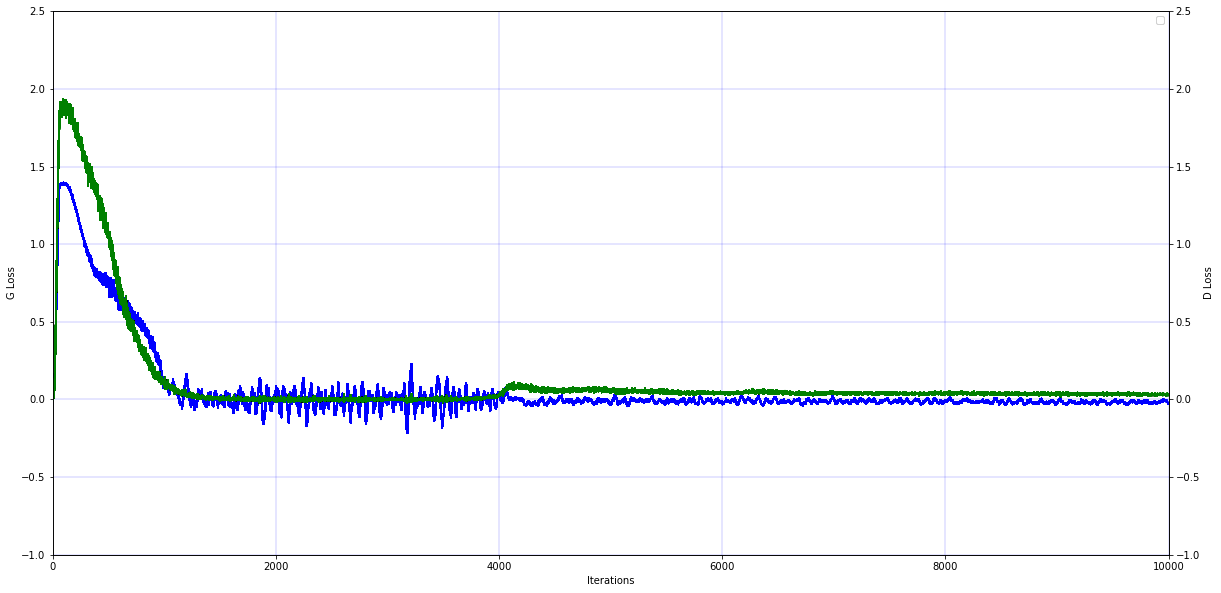

In [59]:
# Execution Phase #

sess = tf.Session() # create a tensorflow session
sess.run(tf.global_variables_initializer()) # initialize all global variables 

# Create an output folder in the working directory for storing the result
if not os.path.exists('out/'):
    os.makedirs('out/')


# the following function is for dynamically plotting the loss of both (Discriminator and Generator) during the training
def plt_dynamic(x, y, y2, ax, colors=['b']):
    for color in colors:       
        ax.plot(x, y, color, label='Generator Error (Loss)')
        ax2.plot(x, y2, 'g', label='Discriminator Error (Loss)')    
    fig.canvas.draw()

# also these are the plotting parameters and settings
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx()
ax.set_xlabel('Iterations') ; ax.set_ylabel('G Loss') ; ax2.set_ylabel('D Loss')
ax.set_xlim(0,10000) ; ax.set_ylim(-1,2.5); ax2.set_ylim(-1,2.5)
ax.legend(['Generator Error (Loss)'])
ax2.legend(['Discriminator Error (Loss)'])
ax.grid(color='b', linestyle='-', linewidth=0.2)
xs, ys, y2s = [], [], []



    
# TRAINING #

i = 0

for it in range(10000): # typically 1m iteration for the training loop !but I chose 10.000 for compelling reasons
    for _ in range(5):
        X_mb, _ = mnist.train.next_batch(mb_size) # train using batches (size of batch: 32) defined previously
            
            # compute the Discriminator loss
        _, D_loss_curr, _ = sess.run([D_solver, D_loss, clip_D], feed_dict={X: X_mb, z: sample_z(mb_size, z_dim)})
        # compute the Generator loss
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={z: sample_z(mb_size, z_dim)})
    
    # recording the loss values for plotting it daynamically
    xs.append(it)
    ys.append(G_loss_curr)
    y2s.append(D_loss_curr)
    plt_dynamic(xs, ys, y2s, ax)
    time.sleep(.2)

    
    # Every 100 Iteration show me the D & G Loss (Which is the unique property of WGAN)
    if it % 100 == 0:
        print('Iteration: {} ---> Discriminator loss: {:.4} | Generator loss: {:.4}'.format(it, D_loss_curr, G_loss_curr))
        
    
    # Every 1000 Iteration Plot and save an example of the outputed sample images to see the progress
    if it % 1000 == 0:
            samples = sess.run(G_sample, feed_dict={z: sample_z(16, z_dim)})
            fig = plot(samples)
            plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
            i += 1
            plt.close(fig)
            
# show the G&D loss plot at the end of training
plt_dynamic(xs, ys, y2s, ax)



The following is the results of the 10.000 iteration, we can clearly see somehow meaingfull digit like formations in the last stag. of course the more you iterate the more you will get better results.


![title](img/10.JPG)

The following plot is for loss during a 5000 Iteration (Generator) is the Blue line and (Discriminator) in Green, we can see that it is not quite converging and not perfectly stable, However still doing much better work than the normal GAN as we saw in a previous graph I showed.

![title](img/11.JPG)

As we can see below the results is not quite correct as I said before that is because training GANs requires much more time in order to give good results.

![title](img/12.JPG)

### Therefor, I decided to hit a higher number of Iterations and see the results, The maximum number of Iterations I could reach is 10.000 iteration. after about more than 5 hours with my laptop suffering and freezing many times. 

##### The results of the 10.000 iteration is shown in the output of the training cell above, just before the 5000 iteration results.

# Conclusion


To conclude, Generative Adverserial Nets are a type of generative models, which they may come in a different types (DCGAN, WGAN, ..). And here in my project I showed an implementation of a WGAN and marked its propreties and how it is doing better that the normal GAN.

I tried to explain everything I learned in the most simplest form, so I didn't write a lot of details (my intention was to make it understandable and not looking so advanced topic).

One thing I would like to say about the dataset, I mentioned in my progress report that I am having a problem with the art dataset but at the end I found a collection of art training data, however it was very very big (35 GB) you may check it in the link below, also I realized that training on such dataset (art) would take MUCHE MUCHE MORE time to converge and to give acceptable results (since it is a more complicated data in its content). So that is why I finally decided to stick with the MNIST dataset (though it is a simpler one it took more than 5 hrs to give some results)

https://drive.google.com/file/d/1yHqS2zXgCiI9LO4gN-X5W18QYXC5bbQS/view



***Side note; I know that I am doing a topic which is out of the scope as you told me, I tried somehow to include sklearn or something that we took in the class but I couldn't, since my hope was that we will take enough about deep learning part at the class (then I will no longer be out of the scope) but unfourtunatly we didn't have time to take enough from it. However, I hope that you take my efforts into considaration as I really learned a lot about something new and very important in the machine learning field.   ***

## - The future of AI is Generative ! -